In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

In [4]:
df = pd.read_csv('train.csv')
print(df.shape)
print(df.dtypes)

(30471, 292)
id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object


In [5]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

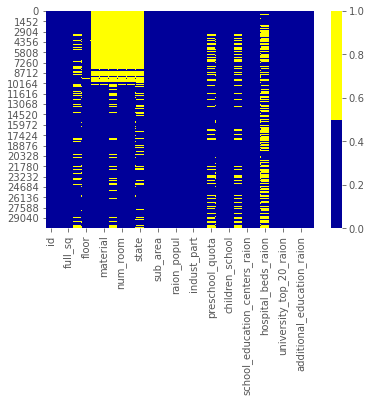

In [6]:
#Missing data heatmap
cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [7]:
#Missing data percentage list
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

id - 0.0%
timestamp - 0.0%
full_sq - 0.0%
life_sq - 21.0%
floor - 1.0%
max_floor - 31.0%
material - 31.0%
build_year - 45.0%
num_room - 31.0%
kitch_sq - 31.0%
state - 44.0%
product_type - 0.0%
sub_area - 0.0%
area_m - 0.0%
raion_popul - 0.0%
green_zone_part - 0.0%
indust_part - 0.0%
children_preschool - 0.0%
preschool_quota - 22.0%
preschool_education_centers_raion - 0.0%
children_school - 0.0%
school_quota - 22.0%
school_education_centers_raion - 0.0%
school_education_centers_top_20_raion - 0.0%
hospital_beds_raion - 47.0%
healthcare_centers_raion - 0.0%
university_top_20_raion - 0.0%
sport_objects_raion - 0.0%
additional_education_raion - 0.0%
culture_objects_top_25 - 0.0%
culture_objects_top_25_raion - 0.0%
shopping_centers_raion - 0.0%
office_raion - 0.0%
thermal_power_plant_raion - 0.0%
incineration_raion - 0.0%
oil_chemistry_raion - 0.0%
radiation_raion - 0.0%
railroad_terminal_raion - 0.0%
big_market_raion - 0.0%
nuclear_reactor_raion - 0.0%
detention_facility_raion - 0.0%
full_

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

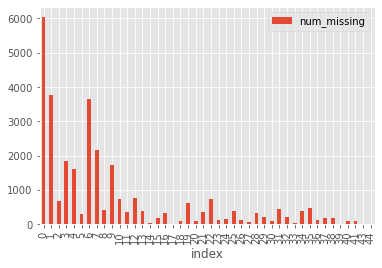

In [8]:
#Missing data Histogram
# first create missing indicator for features with missing data
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# then based on the indicator, plot the histogram of missing values
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')


In [9]:
#Drop the observation
# drop rows with a lot of missing values.
ind_missing = df[df['num_missing'] > 35].index
df_less_missing_rows = df.drop(ind_missing, axis=0)
print(df.shape)
print(df_less_missing_rows.shape)

(30471, 344)
(29779, 344)


In [10]:
#Drop the feature
# hospital_beds_raion has a lot of missing.
# If we want to drop.
cols_to_drop = ['hospital_beds_raion']
df_less_hos_beds_raion = df.drop(cols_to_drop, axis=1)
print(df.shape)
print(df_less_hos_beds_raion.shape)

(30471, 344)
(30471, 343)


In [11]:
#Impute the observation
# replace missing values with the median.
print("values before imputing")
for v in df['hospital_beds_raion']:
    print(v)
med = df['hospital_beds_raion'].median()
print("Median")
print(med)
df['hospital_beds_raion'] = df['hospital_beds_raion'].fillna(med)
print("values after imputing")
for k in df['hospital_beds_raion']:
    print(k)

values before imputing
240.0
229.0
1183.0
nan
562.0
nan
4849.0
240.0
1894.0
2620.0
nan
1084.0
2620.0
1940.0
1575.0
nan
nan
nan
nan
125.0
200.0
nan
1145.0
nan
nan
nan
nan
240.0
nan
320.0
nan
145.0
240.0
2715.0
nan
nan
1406.0
1937.0
2078.0
2078.0
2300.0
1937.0
2729.0
350.0
nan
nan
4087.0
240.0
320.0
1084.0
1937.0
1322.0
1183.0
4129.0
1406.0
1015.0
nan
nan
100.0
nan
920.0
645.0
2729.0
1015.0
4129.0
nan
nan
4129.0
1994.0
nan
240.0
990.0
2301.0
1130.0
4129.0
1322.0
nan
nan
nan
645.0
125.0
nan
145.0
562.0
nan
1308.0
nan
nan
2643.0
350.0
3300.0
705.0
nan
30.0
nan
4702.0
nan
2715.0
750.0
nan
1183.0
nan
240.0
nan
1340.0
nan
nan
1084.0
645.0
145.0
730.0
nan
30.0
1575.0
125.0
1130.0
2300.0
240.0
nan
nan
1322.0
nan
nan
990.0
4702.0
nan
4129.0
nan
nan
1575.0
325.0
nan
nan
3300.0
350.0
1575.0
nan
nan
2301.0
3855.0
1130.0
nan
nan
645.0
30.0
nan
2857.0
3855.0
229.0
nan
1406.0
240.0
nan
620.0
1430.0
1130.0
1020.0
nan
990.0
750.0
nan
165.0
nan
30.0
1430.0
2715.0
nan
nan
990.0
229.0
nan
730.0
1450.0
nan


nan
1430.0
80.0
750.0
1015.0
350.0
1145.0
1340.0
1815.0
nan
nan
nan
2729.0
730.0
nan
562.0
nan
1036.0
2620.0
nan
nan
nan
1145.0
30.0
4702.0
1340.0
262.0
320.0
540.0
nan
229.0
nan
nan
nan
nan
520.0
350.0
2890.0
nan
nan
4702.0
2729.0
1406.0
2857.0
1322.0
1145.0
nan
2729.0
1084.0
830.0
1308.0
nan
nan
nan
770.0
1937.0
750.0
1130.0
3855.0
nan
nan
2300.0
3855.0
176.0
nan
80.0
1970.0
645.0
2300.0
125.0
620.0
2078.0
262.0
770.0
2078.0
nan
nan
nan
30.0
229.0
1970.0
nan
1145.0
2643.0
nan
645.0
30.0
1575.0
nan
4508.0
229.0
nan
176.0
nan
nan
1020.0
2643.0
1937.0
30.0
145.0
1937.0
1406.0
nan
1547.0
900.0
nan
705.0
320.0
2500.0
nan
1145.0
nan
229.0
nan
2672.0
nan
nan
nan
1450.0
1970.0
nan
1015.0
nan
4087.0
nan
3300.0
4849.0
nan
1020.0
1036.0
325.0
nan
75.0
240.0
2620.0
30.0
1015.0
240.0
1183.0
1020.0
1406.0
2857.0
750.0
2300.0
nan
nan
30.0
nan
nan
nan
nan
1046.0
nan
30.0
nan
4508.0
nan
562.0
nan
1937.0
1994.0
3855.0
900.0
176.0
nan
nan
nan
nan
30.0
1145.0
nan
2301.0
1145.0
nan
125.0
1450.0
30.0
nan


nan
192.0
nan
30.0
2301.0
nan
4508.0
125.0
1084.0
nan
nan
nan
nan
1084.0
nan
nan
1970.0
nan
2643.0
1046.0
nan
nan
nan
125.0
125.0
nan
nan
540.0
nan
540.0
nan
1450.0
nan
1145.0
nan
nan
nan
46.0
2300.0
125.0
nan
nan
nan
1406.0
750.0
nan
1046.0
nan
nan
nan
nan
4129.0
540.0
nan
1308.0
nan
125.0
nan
nan
nan
125.0
nan
2672.0
80.0
192.0
900.0
nan
240.0
nan
nan
540.0
540.0
540.0
1130.0
540.0
nan
nan
262.0
2729.0
1084.0
nan
nan
80.0
125.0
240.0
nan
nan
1130.0
nan
nan
145.0
540.0
645.0
nan
2300.0
nan
nan
nan
nan
nan
30.0
nan
nan
nan
900.0
nan
900.0
2300.0
nan
nan
nan
1340.0
730.0
920.0
1084.0
nan
30.0
nan
nan
nan
1046.0
125.0
750.0
730.0
nan
nan
30.0
nan
540.0
562.0
nan
240.0
nan
nan
nan
165.0
1548.0
1183.0
nan
30.0
240.0
nan
nan
nan
nan
nan
4087.0
nan
176.0
nan
370.0
nan
540.0
730.0
1970.0
nan
nan
540.0
nan
540.0
1036.0
540.0
nan
2672.0
540.0
nan
30.0
320.0
nan
nan
540.0
nan
nan
nan
nan
nan
nan
750.0
750.0
2643.0
nan
540.0
540.0
nan
nan
nan
nan
nan
1308.0
nan
nan
520.0
nan
1020.0
325.0
nan
nan


nan
nan
2300.0
nan
nan
nan
262.0
nan
nan
nan
540.0
nan
nan
nan
nan
1183.0
nan
nan
nan
nan
nan
80.0
nan
nan
nan
nan
1183.0
830.0
nan
750.0
920.0
nan
1970.0
nan
750.0
1183.0
nan
1145.0
nan
540.0
1322.0
nan
540.0
2857.0
nan
1430.0
1786.0
1994.0
nan
nan
350.0
628.0
nan
nan
4508.0
1084.0
830.0
nan
1322.0
2301.0
2301.0
nan
nan
1046.0
262.0
990.0
1015.0
nan
nan
nan
nan
4087.0
nan
540.0
75.0
2300.0
240.0
nan
nan
240.0
nan
1450.0
4087.0
nan
1308.0
4087.0
nan
nan
262.0
262.0
nan
540.0
nan
nan
nan
nan
200.0
nan
nan
540.0
2857.0
nan
nan
990.0
nan
30.0
nan
nan
540.0
nan
nan
nan
nan
990.0
nan
325.0
1183.0
nan
nan
32.0
nan
645.0
nan
3300.0
30.0
nan
nan
1937.0
nan
900.0
nan
nan
nan
nan
125.0
4508.0
nan
nan
540.0
nan
4087.0
nan
nan
nan
nan
nan
nan
1940.0
1937.0
46.0
nan
770.0
540.0
nan
920.0
nan
32.0
2729.0
730.0
540.0
nan
nan
1046.0
nan
30.0
30.0
nan
nan
nan
240.0
nan
2078.0
nan
540.0
nan
540.0
nan
nan
46.0
1084.0
2300.0
30.0
80.0
750.0
nan
nan
1130.0
nan
628.0
nan
nan
nan
nan
30.0
1084.0
350.0
1183.0

800.0
nan
350.0
1130.0
540.0
nan
nan
1046.0
nan
nan
nan
nan
nan
1183.0
nan
1406.0
540.0
nan
1970.0
nan
nan
nan
2643.0
nan
nan
990.0
nan
nan
165.0
540.0
nan
1894.0
540.0
nan
nan
nan
540.0
nan
4129.0
1183.0
nan
540.0
nan
nan
nan
240.0
1322.0
262.0
nan
nan
540.0
750.0
4087.0
2672.0
750.0
nan
2672.0
540.0
4508.0
990.0
nan
325.0
1046.0
nan
nan
nan
200.0
540.0
540.0
2620.0
176.0
1046.0
nan
540.0
nan
2672.0
176.0
540.0
nan
nan
325.0
nan
nan
540.0
192.0
nan
nan
540.0
nan
nan
nan
1145.0
80.0
540.0
nan
nan
2078.0
nan
30.0
75.0
nan
1183.0
nan
1020.0
3300.0
nan
nan
2857.0
750.0
nan
nan
nan
540.0
46.0
nan
540.0
nan
nan
1145.0
325.0
nan
nan
nan
540.0
540.0
540.0
229.0
350.0
1183.0
nan
nan
nan
nan
nan
nan
nan
nan
540.0
2620.0
nan
nan
nan
540.0
2890.0
nan
229.0
1046.0
2620.0
nan
nan
100.0
nan
nan
nan
540.0
1015.0
nan
nan
nan
nan
nan
1183.0
nan
2301.0
nan
nan
125.0
125.0
262.0
nan
nan
1036.0
nan
1786.0
2300.0
nan
nan
nan
75.0
nan
30.0
2301.0
nan
1406.0
nan
nan
30.0
30.0
nan
nan
nan
nan
nan
990.0
145.0


nan
80.0
540.0
350.0
46.0
1046.0
540.0
46.0
nan
2890.0
nan
1548.0
165.0
1548.0
1548.0
990.0
nan
1046.0
nan
nan
2643.0
nan
540.0
nan
540.0
1183.0
nan
nan
229.0
540.0
nan
540.0
nan
730.0
540.0
nan
2301.0
nan
nan
540.0
nan
540.0
540.0
540.0
540.0
990.0
nan
730.0
2890.0
1937.0
4129.0
nan
nan
nan
540.0
562.0
nan
nan
540.0
4129.0
325.0
540.0
nan
165.0
540.0
nan
540.0
830.0
240.0
2078.0
1937.0
1575.0
nan
562.0
562.0
nan
nan
nan
750.0
1046.0
2300.0
nan
nan
nan
nan
4129.0
nan
990.0
350.0
nan
125.0
nan
35.0
540.0
nan
830.0
nan
nan
nan
192.0
4849.0
nan
1183.0
620.0
nan
2729.0
1970.0
229.0
830.0
1084.0
540.0
540.0
nan
nan
1940.0
nan
540.0
920.0
nan
540.0
2300.0
3300.0
540.0
100.0
176.0
1406.0
nan
540.0
nan
750.0
176.0
750.0
2672.0
nan
1308.0
540.0
2672.0
540.0
262.0
2300.0
30.0
nan
1970.0
nan
1406.0
540.0
nan
nan
4087.0
nan
540.0
1130.0
nan
nan
240.0
nan
nan
540.0
nan
nan
nan
nan
nan
2715.0
nan
nan
540.0
nan
nan
nan
nan
nan
30.0
262.0
1450.0
540.0
1084.0
1036.0
nan
1548.0
nan
562.0
nan
540.0
229.0

540.0
nan
1308.0
nan
nan
nan
nan
nan
3300.0
1183.0
240.0
920.0
540.0
nan
nan
350.0
nan
645.0
nan
nan
1015.0
3300.0
nan
1322.0
nan
nan
nan
nan
540.0
325.0
540.0
nan
229.0
46.0
nan
1145.0
nan
nan
nan
900.0
nan
nan
2620.0
165.0
nan
nan
540.0
1430.0
nan
125.0
nan
nan
1020.0
nan
nan
4508.0
240.0
nan
35.0
nan
145.0
nan
350.0
nan
30.0
nan
1322.0
nan
nan
1937.0
1084.0
nan
620.0
830.0
nan
nan
1015.0
nan
810.0
240.0
540.0
nan
nan
1970.0
nan
229.0
nan
800.0
2078.0
2715.0
1036.0
1548.0
1145.0
628.0
nan
1970.0
2301.0
nan
1970.0
nan
nan
1937.0
nan
1815.0
nan
1046.0
1046.0
2300.0
nan
1046.0
1130.0
1046.0
nan
nan
1575.0
nan
nan
30.0
2078.0
540.0
1130.0
nan
nan
30.0
1084.0
nan
540.0
30.0
1322.0
nan
nan
4508.0
1322.0
3855.0
990.0
nan
320.0
nan
1970.0
990.0
30.0
nan
nan
nan
nan
1145.0
645.0
810.0
nan
nan
1084.0
nan
1308.0
2300.0
2672.0
nan
2643.0
nan
240.0
nan
1937.0
540.0
nan
1084.0
nan
nan
2078.0
628.0
1145.0
229.0
nan
1430.0
2300.0
2890.0
nan
nan
nan
nan
540.0
325.0
nan
540.0
nan
nan
nan
nan
540.0
nan

262.0
1450.0
nan
nan
nan
nan
1046.0
nan
3855.0
nan
1575.0
320.0
nan
nan
nan
1450.0
nan
2078.0
2078.0
2300.0
2300.0
1046.0
1450.0
262.0
145.0
240.0
nan
nan
nan
1340.0
1145.0
nan
nan
1450.0
1183.0
1015.0
nan
1130.0
229.0
2672.0
nan
nan
540.0
30.0
1145.0
200.0
350.0
540.0
80.0
540.0
nan
nan
nan
645.0
nan
1450.0
nan
2301.0
nan
645.0
1084.0
1020.0
nan
770.0
200.0
320.0
240.0
145.0
nan
810.0
540.0
nan
1340.0
750.0
229.0
4087.0
nan
30.0
nan
nan
176.0
262.0
1183.0
4129.0
nan
1815.0
200.0
540.0
nan
1084.0
nan
3300.0
nan
nan
200.0
nan
1046.0
1322.0
830.0
nan
645.0
730.0
2857.0
nan
1970.0
80.0
30.0
350.0
350.0
3855.0
1046.0
1937.0
nan
125.0
nan
nan
1145.0
165.0
nan
540.0
100.0
nan
nan
nan
nan
nan
320.0
830.0
nan
nan
nan
2620.0
nan
nan
nan
nan
540.0
1015.0
540.0
nan
nan
540.0
1548.0
nan
125.0
nan
750.0
nan
628.0
540.0
nan
nan
1020.0
1450.0
1940.0
nan
nan
nan
2300.0
nan
540.0
nan
30.0
1894.0
30.0
990.0
nan
4849.0
540.0
325.0
540.0
2078.0
730.0
1340.0
nan
2300.0
1937.0
nan
nan
1084.0
540.0
540.0
165

nan
nan
nan
nan
990.0
750.0
nan
nan
1084.0
nan
nan
1970.0
nan
nan
2078.0
1130.0
nan
730.0
nan
nan
nan
nan
nan
nan
2300.0
1046.0
628.0
990.0
nan
2672.0
1046.0
540.0
30.0
nan
1322.0
30.0
nan
nan
nan
nan
1183.0
145.0
nan
nan
nan
nan
nan
540.0
80.0
nan
nan
1548.0
1145.0
2301.0
645.0
4087.0
nan
nan
nan
240.0
1015.0
750.0
262.0
2715.0
nan
645.0
1183.0
2729.0
2300.0
1937.0
nan
nan
2715.0
3300.0
1322.0
2729.0
nan
1937.0
nan
176.0
nan
325.0
1406.0
nan
nan
750.0
620.0
1406.0
1145.0
nan
1084.0
nan
nan
2672.0
nan
nan
1894.0
2300.0
nan
1430.0
nan
nan
nan
540.0
1937.0
4087.0
1046.0
30.0
nan
750.0
4702.0
nan
750.0
3855.0
1430.0
32.0
1084.0
nan
nan
nan
540.0
1145.0
4087.0
nan
nan
705.0
30.0
nan
nan
3855.0
562.0
1548.0
nan
75.0
1406.0
1340.0
540.0
1015.0
nan
2300.0
nan
nan
nan
30.0
1406.0
nan
nan
900.0
750.0
540.0
2672.0
540.0
2300.0
1046.0
750.0
nan
192.0
nan
1036.0
750.0
3300.0
750.0
730.0
1046.0
540.0
nan
1406.0
1036.0
nan
nan
562.0
1340.0
nan
1450.0
nan
nan
nan
750.0
nan
30.0
1406.0
nan
1450.0
176.

nan
192.0
nan
125.0
nan
770.0
540.0
1145.0
nan
2643.0
nan
350.0
540.0
730.0
nan
nan
nan
nan
nan
125.0
750.0
nan
165.0
810.0
240.0
1130.0
2620.0
nan
4508.0
nan
nan
nan
nan
1970.0
nan
1450.0
1786.0
nan
540.0
nan
30.0
1084.0
nan
540.0
1046.0
830.0
nan
nan
nan
325.0
nan
nan
1084.0
nan
2729.0
2300.0
3300.0
240.0
620.0
3300.0
2857.0
nan
nan
350.0
nan
nan
nan
192.0
nan
1450.0
nan
1084.0
nan
750.0
1084.0
2857.0
nan
nan
30.0
2890.0
nan
nan
4508.0
1084.0
4508.0
540.0
540.0
nan
200.0
2672.0
30.0
240.0
nan
nan
30.0
730.0
990.0
nan
1046.0
nan
540.0
240.0
nan
nan
1130.0
30.0
540.0
1430.0
1937.0
350.0
240.0
nan
nan
1046.0
705.0
nan
nan
229.0
192.0
990.0
nan
nan
2078.0
1450.0
nan
705.0
4129.0
nan
nan
4129.0
540.0
nan
540.0
705.0
nan
1322.0
nan
nan
nan
nan
nan
nan
nan
nan
540.0
nan
nan
1575.0
nan
nan
830.0
1970.0
1575.0
2672.0
540.0
nan
nan
30.0
1130.0
nan
nan
nan
540.0
229.0
nan
nan
1046.0
nan
nan
540.0
750.0
nan
176.0
nan
nan
2620.0
2078.0
1046.0
nan
nan
2301.0
1130.0
540.0
1322.0
176.0
nan
nan
2078.

30.0
350.0
nan
540.0
350.0
1406.0
nan
nan
nan
nan
2672.0
nan
3855.0
nan
645.0
nan
nan
2500.0
nan
100.0
nan
1183.0
1183.0
nan
nan
176.0
1450.0
2857.0
540.0
nan
1970.0
1130.0
830.0
nan
1940.0
32.0
nan
nan
1406.0
1145.0
2857.0
nan
100.0
nan
1046.0
nan
540.0
1970.0
nan
2715.0
nan
nan
900.0
4508.0
nan
nan
730.0
1450.0
262.0
176.0
1430.0
nan
nan
nan
nan
830.0
1183.0
1970.0
nan
nan
nan
562.0
nan
nan
4087.0
125.0
240.0
1046.0
nan
nan
nan
nan
nan
240.0
325.0
540.0
nan
2300.0
nan
100.0
1548.0
nan
2301.0
125.0
nan
nan
1450.0
562.0
nan
4087.0
240.0
nan
30.0
240.0
240.0
nan
540.0
2300.0
nan
176.0
540.0
nan
nan
nan
nan
nan
nan
628.0
nan
nan
30.0
628.0
1130.0
nan
1894.0
nan
nan
nan
1145.0
nan
nan
nan
nan
145.0
540.0
nan
nan
nan
nan
nan
1322.0
990.0
nan
1786.0
nan
nan
nan
nan
30.0
nan
nan
nan
1130.0
1046.0
30.0
nan
1575.0
1970.0
nan
3300.0
4087.0
nan
1970.0
nan
nan
2500.0
2672.0
165.0
nan
nan
nan
nan
nan
1322.0
nan
540.0
nan
nan
nan
1046.0
2672.0
2078.0
1406.0
nan
1308.0
nan
nan
nan
2672.0
1548.0
30.0

1015.0
nan
1130.0
125.0
1036.0
nan
nan
1145.0
125.0
46.0
nan
nan
1894.0
nan
1937.0
nan
nan
900.0
nan
125.0
2300.0
80.0
1548.0
810.0
nan
nan
770.0
nan
nan
nan
nan
nan
1406.0
nan
nan
nan
750.0
2643.0
900.0
nan
2301.0
730.0
1450.0
nan
562.0
30.0
nan
125.0
nan
nan
2620.0
nan
nan
nan
520.0
2078.0
nan
nan
nan
1548.0
nan
2078.0
nan
229.0
810.0
1940.0
1548.0
320.0
nan
176.0
nan
nan
nan
nan
2729.0
nan
1145.0
nan
nan
125.0
nan
nan
1015.0
540.0
nan
nan
nan
nan
nan
30.0
229.0
540.0
4702.0
2078.0
nan
nan
nan
nan
4129.0
nan
nan
1970.0
1815.0
nan
1046.0
4087.0
2643.0
nan
229.0
1084.0
nan
1894.0
229.0
800.0
1046.0
4129.0
1940.0
2301.0
nan
nan
1894.0
350.0
990.0
1894.0
nan
1084.0
nan
200.0
1575.0
540.0
540.0
540.0
240.0
2301.0
nan
nan
1575.0
1145.0
1970.0
350.0
240.0
2078.0
nan
229.0
nan
nan
nan
nan
nan
nan
nan
nan
1894.0
nan
nan
nan
nan
3855.0
705.0
540.0
nan
nan
1183.0
nan
620.0
320.0
2300.0
nan
nan
1183.0
176.0
540.0
nan
nan
nan
1020.0
nan
nan
nan
705.0
nan
nan
1130.0
nan
830.0
nan
1183.0
nan
nan
na

900.0
1815.0
nan
nan
nan
30.0
nan
nan
1937.0
nan
1894.0
1406.0
nan
nan
nan
nan
nan
nan
nan
4508.0
nan
125.0
1046.0
nan
645.0
800.0
nan
1547.0
nan
80.0
nan
540.0
2643.0
nan
nan
100.0
nan
520.0
1046.0
229.0
nan
nan
nan
nan
nan
nan
nan
262.0
nan
nan
1183.0
2890.0
4129.0
1145.0
nan
nan
240.0
nan
nan
nan
1084.0
nan
1183.0
nan
620.0
nan
1183.0
nan
nan
nan
nan
350.0
165.0
nan
nan
540.0
1937.0
nan
229.0
nan
nan
nan
540.0
1046.0
nan
1894.0
2890.0
1340.0
2672.0
240.0
nan
nan
nan
30.0
1183.0
562.0
nan
nan
nan
1183.0
1548.0
1046.0
125.0
nan
176.0
645.0
nan
nan
830.0
540.0
4702.0
1046.0
1940.0
3300.0
2500.0
nan
900.0
nan
1036.0
145.0
nan
nan
810.0
nan
nan
nan
830.0
540.0
nan
nan
1340.0
nan
nan
810.0
nan
nan
nan
nan
nan
730.0
540.0
nan
1937.0
1183.0
nan
nan
nan
990.0
nan
1015.0
nan
nan
nan
540.0
4508.0
1130.0
165.0
1406.0
nan
30.0
46.0
nan
1046.0
nan
nan
nan
nan
1970.0
990.0
1183.0
nan
165.0
2715.0
1548.0
nan
1308.0
240.0
4508.0
nan
nan
229.0
nan
nan
30.0
nan
30.0
nan
1036.0
nan
30.0
1183.0
nan
3855

645.0
nan
nan
1430.0
nan
705.0
30.0
nan
nan
3300.0
1036.0
1015.0
nan
nan
nan
900.0
1894.0
nan
nan
nan
nan
nan
nan
540.0
nan
30.0
nan
nan
2672.0
nan
1937.0
2672.0
nan
1183.0
nan
900.0
990.0
645.0
nan
nan
262.0
645.0
nan
540.0
770.0
nan
nan
1130.0
30.0
nan
nan
1894.0
nan
nan
900.0
30.0
nan
1308.0
540.0
nan
1046.0
nan
645.0
nan
520.0
nan
562.0
1406.0
30.0
30.0
nan
2301.0
830.0
990.0
nan
nan
30.0
520.0
2620.0
30.0
176.0
nan
2672.0
nan
nan
125.0
nan
1130.0
4508.0
nan
nan
1130.0
nan
30.0
nan
30.0
nan
nan
2643.0
nan
nan
350.0
4087.0
1786.0
nan
30.0
nan
990.0
nan
nan
nan
192.0
nan
nan
2857.0
2643.0
540.0
830.0
nan
1970.0
1406.0
nan
1084.0
nan
nan
3300.0
1046.0
1046.0
nan
80.0
nan
nan
nan
nan
2715.0
30.0
350.0
nan
4087.0
nan
2857.0
1046.0
1015.0
nan
2643.0
nan
nan
229.0
1937.0
nan
2715.0
nan
30.0
705.0
nan
nan
30.0
nan
nan
nan
1046.0
nan
nan
2300.0
nan
1015.0
540.0
30.0
nan
1970.0
645.0
nan
nan
540.0
nan
628.0
nan
nan
nan
80.0
nan
nan
nan
nan
nan
1547.0
nan
nan
nan
nan
2300.0
325.0
nan
nan
nan


750.0
nan
nan
nan
1036.0
540.0
1015.0
990.0
1940.0
125.0
nan
nan
nan
nan
900.0
2672.0
nan
nan
nan
4508.0
830.0
520.0
30.0
nan
nan
2301.0
30.0
165.0
nan
nan
1036.0
nan
1894.0
325.0
1970.0
262.0
1046.0
1937.0
nan
2620.0
nan
nan
165.0
nan
nan
nan
nan
nan
1430.0
1046.0
1046.0
nan
nan
nan
nan
32.0
nan
165.0
nan
nan
4702.0
1130.0
nan
nan
nan
nan
562.0
nan
1450.0
1145.0
810.0
nan
1084.0
540.0
240.0
920.0
350.0
nan
nan
229.0
145.0
nan
1322.0
2301.0
nan
nan
540.0
nan
nan
nan
nan
1084.0
nan
1046.0
nan
nan
145.0
990.0
2300.0
nan
nan
nan
nan
nan
nan
176.0
4087.0
30.0
1430.0
nan
nan
1183.0
nan
nan
2620.0
nan
1130.0
nan
1937.0
1183.0
1322.0
990.0
2643.0
nan
nan
nan
30.0
2300.0
nan
990.0
325.0
nan
1084.0
30.0
nan
nan
nan
nan
nan
nan
176.0
nan
262.0
nan
1015.0
262.0
2301.0
nan
1015.0
750.0
nan
nan
nan
nan
125.0
nan
125.0
nan
1145.0
nan
nan
80.0
nan
nan
80.0
1322.0
nan
nan
nan
nan
nan
1046.0
3300.0
nan
750.0
nan
nan
nan
nan
nan
830.0
165.0
520.0
1575.0
145.0
nan
nan
nan
900.0
nan
30.0
nan
nan
229.0
230

2643.0
nan
100.0
240.0
192.0
3300.0
705.0
1084.0
192.0
nan
1046.0
192.0
192.0
nan
770.0
165.0
nan
nan
nan
1145.0
nan
350.0
nan
2300.0
2715.0
nan
540.0
1046.0
nan
750.0
nan
nan
nan
2300.0
nan
nan
nan
nan
1183.0
nan
125.0
229.0
nan
nan
30.0
2300.0
nan
229.0
nan
520.0
nan
750.0
730.0
730.0
nan
1046.0
1940.0
2715.0
nan
1036.0
nan
nan
nan
1183.0
192.0
2078.0
192.0
nan
nan
nan
620.0
nan
192.0
nan
nan
4087.0
nan
229.0
750.0
nan
nan
nan
nan
229.0
810.0
nan
nan
900.0
192.0
nan
nan
nan
1322.0
nan
1046.0
1430.0
nan
750.0
1046.0
1046.0
830.0
1940.0
nan
nan
nan
145.0
nan
2643.0
nan
192.0
229.0
750.0
nan
nan
30.0
229.0
192.0
nan
540.0
nan
229.0
3855.0
4087.0
nan
2300.0
165.0
nan
2300.0
nan
2857.0
nan
520.0
nan
30.0
nan
192.0
2300.0
nan
229.0
1145.0
750.0
262.0
830.0
nan
192.0
nan
nan
nan
nan
nan
nan
nan
nan
1183.0
1046.0
2301.0
2857.0
30.0
229.0
nan
2078.0
nan
30.0
520.0
192.0
nan
nan
nan
nan
2078.0
2301.0
nan
nan
nan
1130.0
nan
1406.0
30.0
1015.0
176.0
2890.0
2857.0
nan
nan
nan
nan
705.0
nan
750.0


990.0
2729.0
730.0
990.0
562.0
990.0
1036.0
2620.0
990.0
990.0
990.0
1145.0
30.0
4702.0
1340.0
262.0
320.0
540.0
990.0
229.0
990.0
990.0
990.0
990.0
520.0
350.0
2890.0
990.0
990.0
4702.0
2729.0
1406.0
2857.0
1322.0
1145.0
990.0
2729.0
1084.0
830.0
1308.0
990.0
990.0
990.0
770.0
1937.0
750.0
1130.0
3855.0
990.0
990.0
2300.0
3855.0
176.0
990.0
80.0
1970.0
645.0
2300.0
125.0
620.0
2078.0
262.0
770.0
2078.0
990.0
990.0
990.0
30.0
229.0
1970.0
990.0
1145.0
2643.0
990.0
645.0
30.0
1575.0
990.0
4508.0
229.0
990.0
176.0
990.0
990.0
1020.0
2643.0
1937.0
30.0
145.0
1937.0
1406.0
990.0
1547.0
900.0
990.0
705.0
320.0
2500.0
990.0
1145.0
990.0
229.0
990.0
2672.0
990.0
990.0
990.0
1450.0
1970.0
990.0
1015.0
990.0
4087.0
990.0
3300.0
4849.0
990.0
1020.0
1036.0
325.0
990.0
75.0
240.0
2620.0
30.0
1015.0
240.0
1183.0
1020.0
1406.0
2857.0
750.0
2300.0
990.0
990.0
30.0
990.0
990.0
990.0
990.0
1046.0
990.0
30.0
990.0
4508.0
990.0
562.0
990.0
1937.0
1994.0
3855.0
900.0
176.0
990.0
990.0
990.0
990.0
30.0
114

990.0
705.0
30.0
4849.0
990.0
176.0
990.0
1046.0
1548.0
620.0
990.0
990.0
540.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
1894.0
990.0
229.0
770.0
990.0
990.0
3300.0
990.0
240.0
628.0
990.0
730.0
990.0
990.0
990.0
750.0
990.0
990.0
320.0
990.0
192.0
990.0
30.0
2301.0
990.0
4508.0
125.0
1084.0
990.0
990.0
990.0
990.0
1084.0
990.0
990.0
1970.0
990.0
2643.0
1046.0
990.0
990.0
990.0
125.0
125.0
990.0
990.0
540.0
990.0
540.0
990.0
1450.0
990.0
1145.0
990.0
990.0
990.0
46.0
2300.0
125.0
990.0
990.0
990.0
1406.0
750.0
990.0
1046.0
990.0
990.0
990.0
990.0
4129.0
540.0
990.0
1308.0
990.0
125.0
990.0
990.0
990.0
125.0
990.0
2672.0
80.0
192.0
900.0
990.0
240.0
990.0
990.0
540.0
540.0
540.0
1130.0
540.0
990.0
990.0
262.0
2729.0
1084.0
990.0
990.0
80.0
125.0
240.0
990.0
990.0
1130.0
990.0
990.0
145.0
540.0
645.0
990.0
2300.0
990.0
990.0
990.0
990.0
990.0
30.0
990.0
990.0
990.0
900.0
990.0
900.0
2300.0
990.0
990.0
990.0
1340.0
730.0
920.0
1084.0
990.0
30.0
990.0
990.0
990.0
1046.0


920.0
990.0
32.0
2729.0
730.0
540.0
990.0
990.0
1046.0
990.0
30.0
30.0
990.0
990.0
990.0
240.0
990.0
2078.0
990.0
540.0
990.0
540.0
990.0
990.0
46.0
1084.0
2300.0
30.0
80.0
750.0
990.0
990.0
1130.0
990.0
628.0
990.0
990.0
990.0
990.0
30.0
1084.0
350.0
1183.0
990.0
990.0
1183.0
1970.0
990.0
990.0
990.0
540.0
990.0
990.0
540.0
990.0
990.0
990.0
4508.0
990.0
3300.0
830.0
990.0
350.0
990.0
145.0
990.0
990.0
176.0
990.0
990.0
990.0
990.0
990.0
990.0
1340.0
1340.0
990.0
1046.0
1575.0
990.0
990.0
990.0
1940.0
1575.0
990.0
1970.0
990.0
620.0
990.0
990.0
990.0
990.0
620.0
990.0
990.0
1015.0
645.0
2890.0
990.0
990.0
2857.0
990.0
540.0
990.0
262.0
540.0
540.0
540.0
370.0
990.0
2672.0
1450.0
990.0
990.0
990.0
1322.0
350.0
990.0
990.0
990.0
30.0
990.0
990.0
990.0
990.0
1084.0
990.0
990.0
990.0
1340.0
990.0
30.0
990.0
990.0
325.0
990.0
240.0
990.0
262.0
990.0
990.0
2301.0
990.0
2078.0
990.0
990.0
540.0
125.0
2857.0
990.0
540.0
990.0
990.0
990.0
990.0
350.0
990.0
920.0
830.0
540.0
990.0
1937.0
990.0


2672.0
1894.0
2643.0
990.0
990.0
990.0
990.0
1894.0
192.0
990.0
990.0
990.0
540.0
645.0
1015.0
990.0
540.0
325.0
990.0
990.0
990.0
990.0
990.0
990.0
240.0
990.0
540.0
990.0
1406.0
1015.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
620.0
990.0
990.0
990.0
990.0
990.0
30.0
262.0
990.0
990.0
990.0
3855.0
990.0
990.0
990.0
990.0
990.0
990.0
229.0
990.0
990.0
990.0
990.0
2729.0
990.0
1940.0
240.0
990.0
990.0
3300.0
540.0
1894.0
990.0
176.0
1575.0
990.0
990.0
990.0
810.0
990.0
1970.0
990.0
990.0
990.0
540.0
2301.0
900.0
990.0
4508.0
990.0
645.0
1575.0
540.0
2857.0
990.0
990.0
540.0
1940.0
990.0
990.0
540.0
990.0
990.0
990.0
990.0
2078.0
990.0
990.0
990.0
990.0
540.0
990.0
990.0
990.0
990.0
540.0
990.0
540.0
990.0
990.0
990.0
1183.0
990.0
990.0
562.0
30.0
990.0
540.0
990.0
990.0
990.0
990.0
830.0
628.0
30.0
990.0
990.0
990.0
990.0
1406.0
990.0
990.0
540.0
990.0
262.0
990.0
1894.0
325.0
990.0
990.0
990.0
990.0
990.0
645.0
540.0
990.0
990.0
990.0
990.0
320.0
990.0
990.0
990.0
990.0
990.0
990.0
99

2643.0
1084.0
1406.0
990.0
990.0
920.0
540.0
2729.0
540.0
990.0
540.0
830.0
165.0
730.0
990.0
80.0
990.0
990.0
540.0
1145.0
800.0
2300.0
645.0
125.0
990.0
990.0
990.0
1340.0
540.0
990.0
540.0
2078.0
800.0
540.0
750.0
990.0
540.0
540.0
990.0
540.0
2729.0
30.0
990.0
540.0
540.0
990.0
1015.0
1815.0
990.0
240.0
1046.0
990.0
1183.0
540.0
1308.0
990.0
165.0
990.0
540.0
1786.0
540.0
229.0
990.0
540.0
830.0
192.0
990.0
540.0
540.0
1036.0
990.0
990.0
990.0
540.0
990.0
2500.0
540.0
1940.0
990.0
990.0
620.0
990.0
990.0
990.0
990.0
990.0
1084.0
46.0
770.0
990.0
990.0
990.0
990.0
30.0
750.0
990.0
540.0
1130.0
750.0
262.0
990.0
2301.0
990.0
990.0
2715.0
520.0
540.0
145.0
990.0
990.0
540.0
990.0
990.0
3300.0
46.0
990.0
990.0
1308.0
645.0
990.0
1084.0
990.0
540.0
1046.0
1894.0
30.0
2300.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
770.0
1940.0
990.0
990.0
990.0
990.0
1970.0
990.0
990.0
990.0
1046.0
990.0
990.0
990.0
990.0
800.0
990.0
990.0
1046.0
990.0
990.0
990.0
990.0
990.0
10

540.0
990.0
990.0
540.0
990.0
2078.0
990.0
1340.0
990.0
990.0
240.0
990.0
1322.0
990.0
30.0
990.0
990.0
990.0
540.0
540.0
990.0
540.0
540.0
540.0
1145.0
990.0
1970.0
990.0
770.0
990.0
990.0
2620.0
990.0
990.0
2300.0
3300.0
262.0
990.0
990.0
540.0
990.0
1046.0
1894.0
990.0
540.0
990.0
262.0
540.0
4702.0
320.0
990.0
145.0
990.0
2643.0
990.0
990.0
730.0
2620.0
2672.0
1046.0
1548.0
990.0
1547.0
990.0
540.0
990.0
30.0
990.0
2672.0
2672.0
520.0
730.0
990.0
1406.0
125.0
2300.0
540.0
1145.0
30.0
990.0
990.0
4702.0
990.0
1937.0
990.0
3855.0
2078.0
990.0
990.0
30.0
1130.0
990.0
990.0
540.0
540.0
1046.0
990.0
830.0
990.0
1575.0
1894.0
990.0
540.0
990.0
46.0
520.0
325.0
990.0
540.0
30.0
540.0
370.0
990.0
2301.0
3300.0
990.0
990.0
1084.0
1322.0
990.0
990.0
30.0
30.0
990.0
990.0
229.0
30.0
1046.0
1937.0
540.0
1406.0
990.0
1084.0
990.0
990.0
1084.0
990.0
2672.0
2301.0
1020.0
540.0
1046.0
540.0
2620.0
145.0
540.0
750.0
75.0
990.0
990.0
990.0
125.0
990.0
1970.0
1046.0
2857.0
240.0
30.0
1548.0
540.0
990

990.0
990.0
990.0
990.0
990.0
990.0
2890.0
620.0
1145.0
176.0
990.0
192.0
990.0
990.0
1894.0
990.0
145.0
990.0
990.0
540.0
1406.0
240.0
240.0
990.0
990.0
990.0
4129.0
900.0
2620.0
176.0
990.0
990.0
2300.0
1145.0
1183.0
830.0
4702.0
990.0
2300.0
990.0
1130.0
730.0
2715.0
4087.0
2715.0
4087.0
30.0
990.0
540.0
990.0
990.0
990.0
990.0
145.0
30.0
990.0
990.0
990.0
990.0
540.0
990.0
990.0
990.0
810.0
990.0
990.0
240.0
80.0
1970.0
1548.0
990.0
540.0
990.0
192.0
30.0
990.0
1970.0
2500.0
1084.0
1940.0
200.0
990.0
990.0
990.0
1322.0
540.0
990.0
990.0
1015.0
990.0
990.0
1308.0
990.0
1548.0
990.0
990.0
1340.0
2300.0
990.0
990.0
990.0
990.0
990.0
990.0
176.0
990.0
1084.0
990.0
990.0
1970.0
2078.0
2643.0
990.0
990.0
540.0
240.0
540.0
4087.0
2300.0
990.0
990.0
562.0
2300.0
990.0
990.0
46.0
1046.0
1036.0
1046.0
770.0
990.0
1548.0
990.0
540.0
540.0
990.0
2078.0
990.0
540.0
540.0
540.0
165.0
1322.0
990.0
990.0
900.0
2672.0
165.0
990.0
990.0
262.0
1322.0
2672.0
540.0
30.0
990.0
990.0
990.0
990.0
990.0
99

1548.0
1430.0
2890.0
1548.0
730.0
1937.0
990.0
370.0
990.0
990.0
540.0
990.0
1406.0
990.0
240.0
2857.0
990.0
990.0
990.0
80.0
990.0
176.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
370.0
990.0
350.0
990.0
750.0
1084.0
990.0
990.0
830.0
990.0
990.0
350.0
990.0
990.0
990.0
990.0
540.0
990.0
100.0
1970.0
990.0
2300.0
3855.0
990.0
262.0
990.0
1084.0
990.0
2300.0
990.0
990.0
1084.0
810.0
540.0
990.0
1786.0
3855.0
1015.0
990.0
145.0
990.0
628.0
1406.0
990.0
1322.0
325.0
229.0
540.0
770.0
990.0
990.0
990.0
4087.0
990.0
4508.0
990.0
540.0
990.0
2300.0
1406.0
620.0
830.0
990.0
990.0
990.0
990.0
1145.0
990.0
3855.0
990.0
990.0
2643.0
990.0
2857.0
990.0
1340.0
990.0
990.0
750.0
1322.0
1430.0
990.0
990.0
990.0
990.0
990.0
990.0
30.0
990.0
1322.0
540.0
990.0
990.0
30.0
2300.0
1940.0
229.0
990.0
990.0
990.0
1406.0
1322.0
240.0
990.0
990.0
990.0
30.0
990.0
990.0
350.0
3855.0
990.0
990.0
3300.0
990.0
750.0
350.0
990.0
370.0
125.0
1406.0
1046.0
990.0
1036.0
990.0
990.0
990.0
990.0
1937.0
990.0
750.0
830

1046.0
990.0
2672.0
192.0
990.0
990.0
990.0
1322.0
990.0
830.0
1046.0
990.0
990.0
990.0
2300.0
1130.0
540.0
540.0
990.0
4849.0
1450.0
990.0
990.0
540.0
990.0
125.0
990.0
1548.0
990.0
990.0
229.0
990.0
990.0
620.0
990.0
1815.0
2500.0
990.0
990.0
1548.0
990.0
990.0
990.0
990.0
46.0
46.0
990.0
4129.0
1183.0
990.0
540.0
540.0
540.0
990.0
990.0
990.0
262.0
325.0
350.0
4129.0
145.0
990.0
990.0
2643.0
540.0
990.0
1015.0
1937.0
990.0
520.0
1145.0
990.0
320.0
2620.0
125.0
1786.0
1015.0
1084.0
30.0
240.0
3300.0
990.0
900.0
1308.0
262.0
645.0
990.0
990.0
990.0
1786.0
990.0
229.0
990.0
350.0
1894.0
990.0
990.0
990.0
1894.0
2301.0
1183.0
750.0
990.0
1084.0
990.0
125.0
990.0
2715.0
2715.0
990.0
145.0
540.0
2300.0
3300.0
990.0
990.0
1406.0
990.0
990.0
990.0
192.0
325.0
990.0
990.0
2301.0
1548.0
990.0
990.0
990.0
990.0
540.0
990.0
30.0
990.0
540.0
1937.0
990.0
1548.0
30.0
990.0
810.0
1450.0
750.0
990.0
562.0
3855.0
540.0
990.0
990.0
3855.0
145.0
1406.0
990.0
990.0
990.0
2300.0
990.0
30.0
990.0
2300.0


990.0
540.0
990.0
990.0
540.0
900.0
990.0
990.0
325.0
990.0
125.0
540.0
1786.0
262.0
990.0
990.0
990.0
990.0
990.0
1406.0
165.0
1340.0
4508.0
990.0
990.0
750.0
30.0
2857.0
2857.0
1940.0
2672.0
990.0
990.0
990.0
990.0
990.0
1547.0
990.0
1084.0
990.0
1046.0
1183.0
990.0
990.0
990.0
240.0
1406.0
990.0
2715.0
520.0
1322.0
990.0
990.0
990.0
125.0
990.0
990.0
990.0
990.0
990.0
990.0
229.0
75.0
1815.0
30.0
990.0
730.0
990.0
990.0
990.0
30.0
990.0
1340.0
540.0
990.0
990.0
990.0
990.0
830.0
990.0
30.0
990.0
990.0
990.0
540.0
990.0
990.0
990.0
990.0
540.0
990.0
990.0
990.0
1340.0
2300.0
1548.0
990.0
262.0
2857.0
990.0
990.0
3300.0
990.0
2620.0
1183.0
2301.0
990.0
990.0
900.0
990.0
990.0
350.0
990.0
990.0
1970.0
990.0
990.0
2300.0
990.0
990.0
2857.0
1322.0
990.0
990.0
1046.0
1406.0
645.0
990.0
990.0
990.0
1406.0
2672.0
1183.0
990.0
229.0
990.0
1575.0
990.0
540.0
229.0
990.0
990.0
990.0
262.0
990.0
990.0
990.0
990.0
645.0
990.0
990.0
1036.0
1183.0
30.0
990.0
1937.0
990.0
990.0
990.0
2300.0
3855.0


2078.0
990.0
990.0
990.0
1548.0
990.0
2078.0
990.0
229.0
810.0
1940.0
1548.0
320.0
990.0
176.0
990.0
990.0
990.0
990.0
2729.0
990.0
1145.0
990.0
990.0
125.0
990.0
990.0
1015.0
540.0
990.0
990.0
990.0
990.0
990.0
30.0
229.0
540.0
4702.0
2078.0
990.0
990.0
990.0
990.0
4129.0
990.0
990.0
1970.0
1815.0
990.0
1046.0
4087.0
2643.0
990.0
229.0
1084.0
990.0
1894.0
229.0
800.0
1046.0
4129.0
1940.0
2301.0
990.0
990.0
1894.0
350.0
990.0
1894.0
990.0
1084.0
990.0
200.0
1575.0
540.0
540.0
540.0
240.0
2301.0
990.0
990.0
1575.0
1145.0
1970.0
350.0
240.0
2078.0
990.0
229.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
1894.0
990.0
990.0
990.0
990.0
3855.0
705.0
540.0
990.0
990.0
1183.0
990.0
620.0
320.0
2300.0
990.0
990.0
1183.0
176.0
540.0
990.0
990.0
990.0
1020.0
990.0
990.0
990.0
705.0
990.0
990.0
1130.0
990.0
830.0
990.0
1183.0
990.0
990.0
990.0
1046.0
990.0
262.0
705.0
2857.0
1815.0
1786.0
229.0
990.0
2890.0
1130.0
990.0
810.0
990.0
990.0
1940.0
990.0
990.0
990.0
990.0
1046.0
1940.0
165.0
1937.

1046.0
990.0
990.0
990.0
990.0
990.0
990.0
1548.0
990.0
1450.0
540.0
990.0
1340.0
990.0
990.0
990.0
4508.0
990.0
46.0
1575.0
990.0
520.0
46.0
540.0
125.0
990.0
990.0
990.0
990.0
2078.0
1084.0
80.0
990.0
990.0
165.0
990.0
2300.0
990.0
990.0
990.0
1046.0
1130.0
1940.0
990.0
830.0
990.0
1994.0
810.0
990.0
1036.0
990.0
1340.0
540.0
1450.0
990.0
990.0
32.0
1940.0
990.0
2078.0
2857.0
1940.0
1322.0
1046.0
30.0
645.0
990.0
229.0
990.0
1046.0
1046.0
990.0
990.0
990.0
2729.0
990.0
990.0
990.0
645.0
900.0
2300.0
990.0
2301.0
990.0
990.0
990.0
990.0
350.0
1406.0
990.0
990.0
990.0
990.0
990.0
990.0
750.0
990.0
990.0
990.0
990.0
540.0
46.0
800.0
1145.0
990.0
1894.0
262.0
1308.0
1046.0
145.0
1046.0
990.0
990.0
990.0
1046.0
990.0
3855.0
1940.0
990.0
990.0
990.0
990.0
192.0
1894.0
990.0
2857.0
990.0
2300.0
2729.0
990.0
990.0
990.0
990.0
1084.0
125.0
240.0
4087.0
990.0
990.0
1406.0
990.0
990.0
990.0
145.0
1547.0
2857.0
990.0
990.0
2620.0
990.0
30.0
990.0
990.0
30.0
3855.0
990.0
990.0
30.0
1036.0
30.0
99

990.0
990.0
229.0
1937.0
990.0
2715.0
990.0
30.0
705.0
990.0
990.0
30.0
990.0
990.0
990.0
1046.0
990.0
990.0
2300.0
990.0
1015.0
540.0
30.0
990.0
1970.0
645.0
990.0
990.0
540.0
990.0
628.0
990.0
990.0
990.0
80.0
990.0
990.0
990.0
990.0
990.0
1547.0
990.0
990.0
990.0
990.0
2300.0
325.0
990.0
990.0
990.0
990.0
46.0
165.0
1994.0
990.0
990.0
705.0
2643.0
990.0
990.0
830.0
1548.0
1020.0
1970.0
990.0
240.0
1046.0
990.0
990.0
645.0
1548.0
2301.0
2078.0
990.0
30.0
990.0
990.0
990.0
1308.0
1575.0
990.0
2620.0
990.0
325.0
2729.0
990.0
1183.0
990.0
990.0
990.0
2857.0
1894.0
325.0
990.0
990.0
192.0
2300.0
990.0
520.0
990.0
990.0
75.0
1548.0
2300.0
900.0
990.0
540.0
2301.0
30.0
30.0
990.0
145.0
1548.0
1015.0
1548.0
325.0
35.0
990.0
30.0
990.0
165.0
990.0
1183.0
2078.0
990.0
990.0
4087.0
1786.0
990.0
990.0
2715.0
990.0
990.0
990.0
229.0
990.0
540.0
990.0
750.0
1183.0
990.0
1815.0
30.0
1036.0
0.0
990.0
990.0
4087.0
990.0
990.0
730.0
990.0
2672.0
229.0
1450.0
990.0
540.0
830.0
3300.0
2643.0
1020.0
101

990.0
100.0
1322.0
990.0
30.0
990.0
30.0
990.0
1015.0
2078.0
990.0
1450.0
325.0
990.0
990.0
1036.0
990.0
1547.0
990.0
262.0
990.0
240.0
540.0
990.0
30.0
1970.0
1046.0
240.0
990.0
4508.0
30.0
1183.0
145.0
2729.0
990.0
990.0
1020.0
1548.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
229.0
1940.0
990.0
1430.0
990.0
520.0
990.0
990.0
900.0
990.0
1046.0
145.0
990.0
2300.0
30.0
990.0
350.0
320.0
1084.0
320.0
30.0
900.0
1046.0
990.0
990.0
990.0
900.0
125.0
990.0
990.0
990.0
990.0
540.0
990.0
990.0
125.0
2620.0
540.0
1036.0
990.0
990.0
1084.0
990.0
990.0
990.0
990.0
30.0
990.0
990.0
1815.0
990.0
990.0
1084.0
990.0
990.0
1036.0
229.0
990.0
810.0
990.0
176.0
540.0
1970.0
705.0
990.0
990.0
990.0
990.0
1046.0
2301.0
990.0
990.0
990.0
645.0
30.0
990.0
30.0
990.0
1036.0
325.0
990.0
990.0
4087.0
1322.0
1084.0
2643.0
800.0
990.0
705.0
990.0
990.0
990.0
990.0
1406.0
990.0
1322.0
145.0
350.0
990.0
1322.0
2672.0
1937.0
990.0
2300.0
990.0
1548.0
990.0
2890.0
990.0
4087.0
1894.0
520.0
730.0
990.0
1937.0
4129.

920.0
1046.0
900.0
990.0
990.0
990.0
705.0
1046.0
990.0
705.0
990.0
192.0
1046.0
628.0
262.0
990.0
810.0
990.0
176.0
990.0
1937.0
990.0
990.0
1046.0
2643.0
2300.0
229.0
990.0
350.0
990.0
176.0
990.0
990.0
990.0
990.0
1940.0
75.0
165.0
990.0
46.0
145.0
990.0
990.0
990.0
350.0
990.0
240.0
705.0
990.0
990.0
1548.0
750.0
2300.0
830.0
990.0
990.0
990.0
990.0
810.0
2620.0
990.0
990.0
125.0
770.0
1308.0
990.0
990.0
176.0
1450.0
165.0
1046.0
30.0
520.0
990.0
229.0
990.0
990.0
990.0
705.0
229.0
1084.0
1084.0
1046.0
1940.0
229.0
1450.0
2301.0
229.0
4129.0
990.0
1183.0
990.0
990.0
628.0
990.0
990.0
229.0
192.0
240.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
540.0
229.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
192.0
1940.0
1084.0
125.0
3855.0
990.0
750.0
80.0
990.0
540.0
990.0
990.0
990.0
990.0
80.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
192.0
540.0
1970.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
990.0
125.0
1084.0
990.0
1970.0
628.0
990.0
990.0
1046.0
1046.0
520.0
990.0
2078.0
75

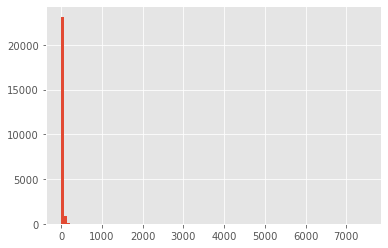

In [15]:
#Outlier Analysis for numerical features
#Histogram
df['life_sq'].hist(bins=100)

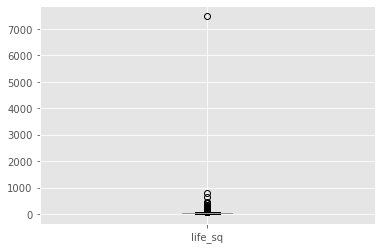

In [22]:
# box plot.
df.boxplot(column=['life_sq'])

In [23]:
#Descriptive statistics
df['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

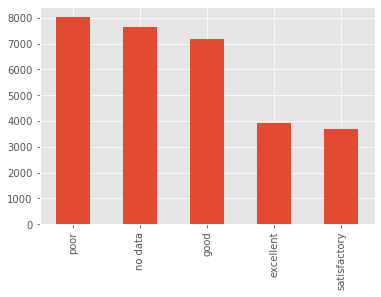

In [24]:
df['ecology'].value_counts().plot.bar()